# visualization using jupyter notebook

visualization of weights and bias sample script:
- https://www.tensorflow.org/versions/r0.10/get_started/#introduction
- http://www.lotharschulz.info/2016/08/01/tensorflow-virtualenv-pycharm/ 

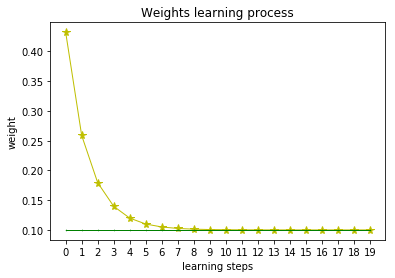

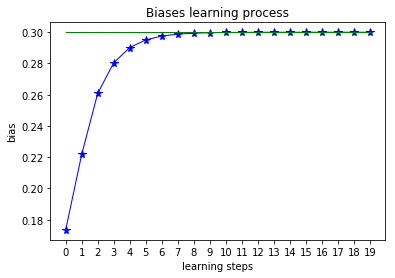

In [86]:
# http://www.lotharschulz.info/2016/08/01/tensorflow-virtualenv-pycharm/
# tf code from https://www.tensorflow.org/versions/r0.10/get_started/#introduction
import tensorflow as tf
import numpy as np
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
import matplotlib.pyplot as plt


#@interact(dummmy_weights=0.1, dummy_bias=0.3)
@interact(dummmy_weight=widgets.FloatSlider(min=0.0,max=1.0,step=0.1,value=0.1), 
          dummy_bias=widgets.FloatSlider(min=0.0,max=1.0,step=0.1,value=0.3),
          tf_learning_rate=widgets.FloatSlider(min=0.2,max=0.8,step=0.1,value=0.5),
          steps=widgets.IntSlider(min=2,max=20,step=1,value=20)
         )
def two_dims_2_aline(dummmy_weight=0.1, dummy_bias=0.3, tf_learning_rate=0.5, steps=20):
    x_data = np.random.rand(100).astype(np.float32)
    y_data = x_data * dummmy_weight + dummy_bias

    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
    b = tf.Variable(tf.zeros([1]))
    y = x_data * W + b

    loss = tf.reduce_mean(tf.square(y - y_data))
    optimizer = tf.train.GradientDescentOptimizer(tf_learning_rate)
    train = optimizer.minimize(loss)

    init = tf.global_variables_initializer()

    sess = tf.Session()
    sess.run(init)
    
    diagram = [[] for y in range(2)] 
    for step in range(201):
        sess.run(train)
        if step % 10 == 0:
            if(len(diagram[0]) < steps):
                diagram[0].append(sess.run(W)[0]) # weights
                diagram[1].append(sess.run(b)[0]) # biases

    plt.title("Weights learning process")
    plt.xlabel("learning steps")
    plt.xticks([a for a in range(len(diagram[0])+1) if a%1 == 0 ])
    plt.ylabel("weight")
    
    plt.plot(diagram[0], "r*-", markersize=8, linewidth=1, color='y', label="weights")
    plt.plot([dummmy_weight for a in range(len(diagram[0]))], "r*-", markersize=1, linewidth=1, color='g', label="dummmy_weights")
    plt.show()

    
    plt.title("Biases learning process")
    plt.xlabel("learning steps")
    plt.xticks([a for a in range(len(diagram[1])+1) if a%1 == 0 ])
    plt.ylabel("bias")

    plt.plot(diagram[1], "r*-", markersize=8, linewidth=1, color='b', label="biases")
    plt.plot([dummy_bias for a in range(len(diagram[0]))], "r*-", markersize=1, linewidth=1, color='g', label="dummy_bias")
    
    plt.show()